# DATA 603 - Final Project
## Used Car Price Analysis

Debanjan Chowhury

Jin Hui Xu

Sooyeon Choi

#### Libraries

In [ ]:
pip install shapely

Python interpreter will be restarted.
Requirement already satisfied: shapely in /local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/lib/python3.8/site-packages (1.7.1)
WARNING: You are using pip version 20.2.4; however, version 21.1.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [ ]:
pip install geopandas

Python interpreter will be restarted.
Requirement already satisfied: geopandas in /local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/lib/python3.8/site-packages (0.9.0)
Requirement already satisfied: pyproj>=2.2.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/lib/python3.8/site-packages (from geopandas) (3.0.1)
Requirement already satisfied: shapely>=1.6 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/lib/python3.8/site-packages (from geopandas) (1.7.1)
Requirement already satisfied: fiona>=1.8 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/lib/python3.8/site-packages (from geopandas) (1.8.19)
Requirement already satisfied: pandas>=0.24.0 in /databricks/python3/lib/python3.8/site-packages (from geopandas) (1.1.3)
Requirement already satisfied: certifi in /databricks/python3/lib/python3.8/site-packages (from pyproj>=2.2.0->geopandas) (2020.12.5)
Requirement already satisfied: attrs>=17 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (21.2.0)
Requirement already satisfied: cligj>=0.5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (0.7.1)
Requirement already satisfied: click-plugins>=1.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (1.1.1)
Requirement already satisfied: click<8,>=4.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (7.1.2)
Requirement already satisfied: six>=1.7 in /usr/local/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (1.15.0)
Requirement already satisfied: munch in /local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (2.5.0)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.24.0->geopandas) (2.8.1)
Requirement already satisfied: pytz>=2017.2 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.24.0->geopandas) (2020.5)
Requirement already satisfied: numpy>=1.15.4 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.24.0->geopandas) (1.19.2)
WARNING: You are using pip version 20.2.4; however, version 21.1.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-325da6a2-c2ee-4291-933d-d76fa38c480c/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import RegressionEvaluator
import numpy as np
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import RFormula
from pyspark.ml.regression import DecisionTreeRegressor
import pandas as pd
from pyspark.ml.feature import Imputer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.feature import Binarizer, Bucketizer
import requests
from pyspark.ml.feature import Tokenizer, RegexTokenizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import RandomForestClassifier
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

#### Load Data

In [ ]:
file_schema = StructType([StructField('vin', StringType(), True),
                          StructField('back_legroom', StringType(), True),
                          StructField('bed', StringType(), True),  
                          StructField('bed_height', StringType(), True),                  
                          StructField('bed_length', StringType(), True),      
                          StructField('body_type', StringType(), True),
                          StructField('cabin', StringType(), True),
                          StructField('city', StringType(), True),
                          StructField('city_fuel_economy', IntegerType(), True),       
                          StructField('combine_fuel_economy', IntegerType(), True),       
                          StructField('daysonmarket', IntegerType(), True),       
                          StructField('dealer_zip', StringType(), True),                 
                          StructField('description', StringType(), True),       
                          StructField('engine_cylinders', StringType(), True),       
                          StructField('engine_displacement', IntegerType(), True),       
                          StructField('engine_type', StringType(), True),
                          StructField('exterior_color', StringType(), True), 
                          StructField('fleet', BooleanType(), True), 
                          StructField('frame_damaged', BooleanType(), True), 
                          StructField('franchise_dealer', BooleanType(), True), 
                          StructField('franchise_make', StringType(), True), 
                          StructField('front_legroom', StringType(), True), 
                          StructField('fuel_tank_volume', StringType(), True), 
                          StructField('fuel_type', StringType(), True), 
                          StructField('has_accidents', BooleanType(), True), 
                          StructField('height', StringType(), True), 
                          StructField('highway_fuel_economy', IntegerType(), True), 
                          StructField('horsepower', IntegerType(), True), 
                          StructField('interior_color', StringType(), True), 
                          StructField('isCab', BooleanType(), True), 
                          StructField('is_certified', BooleanType(), True), 
                          StructField('is_cpo', BooleanType(), True), 
                          StructField('is_new', BooleanType(), True), 
                          StructField('is_oemcpo', BooleanType(), True), 
                          StructField('latitude', DoubleType(), True), 
                          StructField('length', StringType(), True), 
                          StructField('listed_date', DateType(), True), 
                          StructField('listing_color', StringType(), True), 
                          StructField('listing_id', StringType(), True), 
                          StructField('longitude', DoubleType(), True), 
                          StructField('main_picture_url', StringType(), True), 
                          StructField('major_options', StringType(), True), 
                          StructField('make_name', StringType(), True), 
                          StructField('maximum_seating', StringType(), True), 
                          StructField('mileage', StringType(), True), 
                          StructField('model_name', StringType(), True),                       
                          StructField('owner_count', StringType(), True), 
                          StructField('power', StringType(), True), 
                          StructField('price', StringType(), True), 
                          StructField('salvage', BooleanType(), True), 
                          StructField('savings_amount', IntegerType(), True), 
                          StructField('seller_rating', FloatType(), True),  
                          StructField('sp_id', IntegerType(), True), 
                          StructField('sp_name', StringType(), True), 
                          StructField('theft_title', BooleanType(), True), 
                          StructField('torque', StringType(), True), 
                          StructField('transmission', StringType(), True), 
                          StructField('transmission_display', StringType(), True),  
                          StructField('trimId', StringType(), True), 
                          StructField('trim_name', StringType(), True),  
                          StructField('vehicle_damage_category', StringType(), True), 
                          StructField('wheel_system', StringType(), True), 
                          StructField('wheel_system_display', StringType(), True), 
                          StructField('wheelbase', StringType(), True), 
                          StructField('width', StringType(), True), 
                          StructField('year', IntegerType(), True),  
                     ])

In [ ]:
inputPath = '/FileStore/tables/project/used_cars_data_001.csv'

file_df = (
  spark.
  read
  .schema(file_schema)               
  .option("header",True)
  .option("quote",'"')
  .option("escape", '"')
  .csv(inputPath)
)

In [ ]:
file_df.cache()

Out[4]: DataFrame[vin: string, back_legroom: string, bed: string, bed_height: string, bed_length: string, body_type: string, cabin: string, city: string, city_fuel_economy: int, combine_fuel_economy: int, daysonmarket: int, dealer_zip: string, description: string, engine_cylinders: string, engine_displacement: int, engine_type: string, exterior_color: string, fleet: boolean, frame_damaged: boolean, franchise_dealer: boolean, franchise_make: string, front_legroom: string, fuel_tank_volume: string, fuel_type: string, has_accidents: boolean, height: string, highway_fuel_economy: int, horsepower: int, interior_color: string, isCab: boolean, is_certified: boolean, is_cpo: boolean, is_new: boolean, is_oemcpo: boolean, latitude: double, length: string, listed_date: date, listing_color: string, listing_id: string, longitude: double, main_picture_url: string, major_options: string, make_name: string, maximum_seating: string, mileage: string, model_name: string, owner_count: string, power: string, price: string, salvage: boolean, savings_amount: int, seller_rating: float, sp_id: int, sp_name: string, theft_title: boolean, torque: string, transmission: string, transmission_display: string, trimId: string, trim_name: string, vehicle_damage_category: string, wheel_system: string, wheel_system_display: string, wheelbase: string, width: string, year: int]

In [ ]:
file_df.count()

Out[5]: 300000

In [ ]:
file_df.printSchema()

root
-- vin: string (nullable = true)
-- back_legroom: string (nullable = true)
-- bed: string (nullable = true)
-- bed_height: string (nullable = true)
-- bed_length: string (nullable = true)
-- body_type: string (nullable = true)
-- cabin: string (nullable = true)
-- city: string (nullable = true)
-- city_fuel_economy: integer (nullable = true)
-- combine_fuel_economy: integer (nullable = true)
-- daysonmarket: integer (nullable = true)
-- dealer_zip: string (nullable = true)
-- description: string (nullable = true)
-- engine_cylinders: string (nullable = true)
-- engine_displacement: integer (nullable = true)
-- engine_type: string (nullable = true)
-- exterior_color: string (nullable = true)
-- fleet: boolean (nullable = true)
-- frame_damaged: boolean (nullable = true)
-- franchise_dealer: boolean (nullable = true)
-- franchise_make: string (nullable = true)
-- front_legroom: string (nullable = true)
-- fuel_tank_volume: string (nullable = true)
-- fuel_type: string (nullable = true)
-- has_accidents: boolean (nullable = true)
-- height: string (nullable = true)
-- highway_fuel_economy: integer (nullable = true)
-- horsepower: integer (nullable = true)
-- interior_color: string (nullable = true)
-- isCab: boolean (nullable = true)
-- is_certified: boolean (nullable = true)
-- is_cpo: boolean (nullable = true)
-- is_new: boolean (nullable = true)
-- is_oemcpo: boolean (nullable = true)
-- latitude: double (nullable = true)
-- length: string (nullable = true)
-- listed_date: date (nullable = true)
-- listing_color: string (nullable = true)
-- listing_id: string (nullable = true)
-- longitude: double (nullable = true)
-- main_picture_url: string (nullable = true)
-- major_options: string (nullable = true)
-- make_name: string (nullable = true)
-- maximum_seating: string (nullable = true)
-- mileage: string (nullable = true)
-- model_name: string (nullable = true)
-- owner_count: string (nullable = true)
-- power: string (nullable = true)
-- price: string (nullable = true)
-- salvage: boolean (nullable = true)
-- savings_amount: integer (nullable = true)
-- seller_rating: float (nullable = true)
-- sp_id: integer (nullable = true)
-- sp_name: string (nullable = true)
-- theft_title: boolean (nullable = true)
-- torque: string (nullable = true)
-- transmission: string (nullable = true)
-- transmission_display: string (nullable = true)
-- trimId: string (nullable = true)
-- trim_name: string (nullable = true)
-- vehicle_damage_category: string (nullable = true)
-- wheel_system: string (nullable = true)
-- wheel_system_display: string (nullable = true)
-- wheelbase: string (nullable = true)
-- width: string (nullable = true)
-- year: integer (nullable = true)

In [ ]:
display(file_df.limit(5))

vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
JN8AT2MV7LW133390,37.9 in,null,null,null,SUV / Crossover,null,Hartford,null,null,222,06120,"[!@@Additional Info@@!]6.386 Axle Ratio,Heated Front Bucket Seats,Cloth Seat Trim,Radio: AM/FM/CD/AUX,Black Splash Guards (Set of 4),Chrome Rear Bumper Protector,Floor Mats & 2-PC Cargo Area Protector,First Aid Kit,4-Wheel Disc Brakes,6 Speakers,Air Conditioning,Electronic Stability Control,Front Bucket Seats,Leather Shift Knob,Power Liftgate,Spoiler,Tachometer,ABS brakes,Alloy wheels,Anti-whiplash front head restraints,Automatic temperature control,Brake assist,Bumpers: body-color,CD player,Delay-off headlights,Driver door bin,Driver vanity mirror,Dual front impact airbags,Dual front side impact airbags,Four wheel independent suspension,Front anti-roll bar,Front dual zone A/C,Front reading lights,Fully automatic headlights,Heated door mirrors,Heated front seats,Illuminated entry,Low tire pressure warning,Occupant sensing airbag,Outside temperature display,Overhead airbag,Overhead console,Panic alarm,Passenger door bin,Passenger vanity mirror,Power door mirrors,Power driver seat,Power steering,Power windows,Radio data system,Rear anti-roll bar,Rear seat center armrest,Rear window defroster,Rear window wiper,Remote keyless entry,Roof rack: rails only,Security system,Speed control,Speed-sensing steering,Split folding rear seat,Steering wheel mounted audio controls,Telescoping steering wheel,Tilt steering wheel,Traction control,Trip computer,Turn signal indicator mirrors,Variably intermittent wipers,Front beverage holders,Blind Spot Warning,Lane Departure Warning System,Front Center Armrest w/Storage,AM/FM radio: SiriusXM,Auto High-beam Headlights,NissanConnect featuring Apple CarPlay and Android Auto",I4,null,I4,Caspian Blue Metallic,null,null,true,Nissan,43 in,14.5 gal,Gasoline,null,68.5 in,null,null,Black (Charcoal),null,null,null,true,null,41.7912,184.5 in,2020-01-31,BLUE,264599347,-72.6564,https://static.cargurus.com/images/forsale/2020/08/20/12/55/2020_nissan_rogue-pic-6475140510501746945-152x114.jpeg,['Alloy Wheels'],Nissan,5 seats,5.0,Rogue,null,"170 hp @ 6,000 RPM",29790.0,null,0,4.6666665,66446,Harte Nissan,null,"175 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,t86700,SV AWD,null,AWD,All-Wheel Drive,106.5 in,72.4 in,2020
1C4RJFBG2MC528077,38.6 in,null,null,null,SUV / Crossover,null,Bristol,null,null,25,06010,", Located at Crowley Chrysler Jeep on Route 6 in Bristol. OPTIONS Include:. Diamond Black 4WD 8-Speed Automatic 3.6L V6 24V VVT 2021 Jeep Grand Cherokee Limited Price includes: $2000 - 2021 National Retail Consumer Cash 21CM1. Exp. 09/30/2020 $500 - Chrysler Capital 2021 Bonus Cash 20CM5. Exp. 09/30/2020[!@@Additional Info@@!]Quick Order Package 2BK 80th,3.45 Rear Axle Ratio,Wheels: 18"" x 8.0"" Tech Gray Diamond Cut,Wheels: 20"" x 8.0"" Granite Crystal Aluminum...,Leather Trimmed Bucket Seats,Leather Trimmed Bucket Seats (JY),Normal Duty Suspension,Dual-Pane Panoramic Sunroof,80th Anniversary Luxury Group,Premium Lighting Group,Radio: Uconnect 4C Nav w/8.4"" Display,Cargo Compartment Cover,Jeep 80th Anniversary Edition,Advanced Brake Assist,Ventilated Front Seats...,LT. Tungsten Interior Accent Stitching,Jeep 80th Anniversary Oak Keyfob Medallion,Berber Fl

Select interested columns from the original dataset

In [ ]:
selected_column_df = file_df.select("body_type", "exterior_color", "interior_color", "fuel_type", "has_accidents", "is_new", "make_name", "maximum_seating", "mileage", "model_name", "owner_count",
                                   "wheel_system", "year", "length", "width", "city", "price")

In [ ]:
display(selected_column_df.limit(10))

body_type,exterior_color,interior_color,fuel_type,has_accidents,is_new,make_name,maximum_seating,mileage,model_name,owner_count,wheel_system,year,length,width,city,price
SUV / Crossover,Caspian Blue Metallic,Black (Charcoal),Gasoline,null,true,Nissan,5 seats,5.0,Rogue,null,AWD,2020,184.5 in,72.4 in,Hartford,29790.0
SUV / Crossover,Diamond Black,None,Gasoline,null,true,Jeep,5 seats,null,Grand Cherokee,null,4WD,2021,189.8 in,84.8 in,Bristol,46165.0
Sedan,Gray,None,Hybrid,false,false,Toyota,5 seats,456.0,Corolla Hybrid,1.0,FWD,2020,182.3 in,70.1 in,Tilton,21995.0
SUV / Crossover,Magnetic Black Pearl,Black (Charcoal),Gasoline,null,true,Nissan,5 seats,1.0,Rogue,null,AWD,2020,184.5 in,72.4 in,Hartford,31590.0
SUV / Crossover,Brilliant Silver Metallic,Black (Charcoal),Gasoline,null,true,Nissan,5 seats,1.0,Rogue,null,AWD,2020,184.5 in,72.4 in,Albany,27955.0
SUV / Crossover,Summit White,JET BLACK,Gasoline,null,true,Chevrolet,5 seats,1.0,Trax,null,FWD,2020,167.6 in,69.9 in,Tilton,19224.0
SUV / Crossover,Caspian Blue Metallic,Black (Charcoal),Gasoline,null,true,Nissan,5 seats,5.0,Rogue,null,AWD,2020,184.5 in,72.4 in,Hartford,29790.0
SUV / Crossover,Winterberry Red Metallic,Black (Ebony),Gasoline,null,true,Buick,5 seats,1.0,Encore,null,FWD,2020,168.4 in,70.1 in,Tilton,18052.0
Sedan,Carbon Black Metallic,Black (ebony),Gasoline,false,false,Buick,5 seats,84814.0,Regal,1.0,FWD,2011,190.2 in,73.1 in,Rhinebeck,9500.0
SUV / Crossover,Pacific Blue Metallic,JET BLACK,Gasoline,null,true,Chevrolet,5 seats,1.0,Equinox,null,FWD,2020,183.1 in,72.6 in,Tilton,23978.0


###Data Cleansing

Summary of null values in each column

In [ ]:
selected_column_df.select([count(when(col(c).isNull(), c)).alias(c) for c in selected_column_df.columns]).show()


+---------+--------------+--------------+---------+-------------+------+---------+---------------+-------+----------+-----------+------------+----+------+-----+----+-----+
body_type|exterior_color|interior_color|fuel_type|has_accidents|is_new|make_name|maximum_seating|mileage|model_name|owner_count|wheel_system|year|length|width|city|price|
+---------+--------------+--------------+---------+-------------+------+---------+---------------+-------+----------+-----------+------------+----+------+-----+----+-----+
 1308| 0| 1| 7215| 142917| 0| 0| 14395| 14051| 0| 152650| 13775| 0| 14395|14395| 0| 0|
+---------+--------------+--------------+---------+-------------+------+---------+---------------+-------+----------+-----------+------------+----+------+-----+----+-----+

Replace Null values for some columns

In [ ]:
transform_df = selected_column_df.na.fill('--', 'body_type').na.fill("--", 'wheel_system').na.fill(False, 'has_accidents').na.fill("--", "fuel_type").na.fill("--", "interior_color")

Impute: Cast to Double

In [ ]:
transform_df = transform_df.withColumn("mileage", transform_df["mileage"].cast(DoubleType()))
transform_df = transform_df.withColumn("maximum_seating", translate(col("maximum_seating"), "seats", "").cast(DoubleType()))
transform_df = transform_df.withColumn("length", translate(col("length"), "in", "").cast(DoubleType()))
transform_df = transform_df.withColumn("width", translate(col("width"), "in", "").cast(DoubleType()))
transform_df = transform_df.withColumn("price", transform_df["price"].cast(DoubleType()))
transform_df = transform_df.withColumn("has_accidents", transform_df["has_accidents"].cast(StringType()))
transform_df = transform_df.withColumn("is_new", transform_df["is_new"].cast(StringType()))
transform_df = transform_df.withColumn("year", transform_df["year"].cast(DoubleType()))
transform_df = transform_df.withColumn("owner_count", transform_df["owner_count"].cast(DoubleType()))

In [ ]:
imputeCols = [
  "mileage",
  "maximum_seating",
  "length", 
  "width",
  "year",
  "owner_count",
  "price"
]

imputer = Imputer(
    inputCols=imputeCols, 
    outputCols=["{}".format(c) for c in imputeCols]
    ).setStrategy("median")

# Add imputation cols to df
# fill NA with median value
transform_df = imputer.fit(transform_df).transform(transform_df)

In [ ]:
transform_df.select([count(when(col(c).isNull(), c)).alias(c) for c in transform_df.columns]).show()

+---------+--------------+--------------+---------+-------------+------+---------+---------------+-------+----------+-----------+------------+----+------+-----+----+-----+
body_type|exterior_color|interior_color|fuel_type|has_accidents|is_new|make_name|maximum_seating|mileage|model_name|owner_count|wheel_system|year|length|width|city|price|
+---------+--------------+--------------+---------+-------------+------+---------+---------------+-------+----------+-----------+------------+----+------+-----+----+-----+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+---------+--------------+--------------+---------+-------------+------+---------+---------------+-------+----------+-----------+------------+----+------+-----+----+-----+

Data is cleansed now and ready for analysis and learning models

### Data Exploration Analysis

List of distinct body type

Count the number of cars by body type and order by the resulting counts in descending order

In [ ]:
display(transform_df.select("body_type").where(col("body_type").isNotNull()).groupBy("body_type").count().orderBy("count", ascending=False))

body_type,count
SUV / Crossover,156880
Sedan,72443
Pickup Truck,35967
Hatchback,8620
Minivan,7276
Coupe,5816
Van,5716
Wagon,3812
Convertible,2162
--,1308


List average price for each body type

In [ ]:
display(transform_df.groupBy("body_type").agg(mean("price")).orderBy(mean("price"), ascending=False))


body_type,avg(price)
Convertible,48201.05272895467
Coupe,41206.9527321183
--,40786.48088685015
Pickup Truck,39836.04394722941
SUV / Crossover,30544.025050038235
Van,29422.265745276418
Minivan,24564.371632765255
Sedan,22949.102400922104
Wagon,20659.276101783842
Hatchback,18230.67877262181


List of distinct maximum seating

Count the number of cars by maximum seating and order by the resulting counts in descending order

In [ ]:
display(transform_df.select("maximum_seating").where(col("maximum_seating").isNotNull()).groupBy("maximum_seating").count().orderBy("count", ascending=False))

maximum_seating,count
5.0,213636
7.0,30146
6.0,23593
8.0,17506
4.0,7010
2.0,3894
3.0,3219
15.0,530
9.0,225
12.0,170


List average price for each maximum seating

In [ ]:
display(transform_df.where(col("maximum_seating").isNotNull()).groupBy("maximum_seating").agg(mean("price")).orderBy(mean("price"), ascending=False))

maximum_seating,avg(price)
2.0,41008.04494093477
6.0,39197.70183952867
8.0,38764.80366731407
10.0,35500.74647887324
3.0,33886.16216216216
7.0,33423.651357725736
4.0,32763.547681883025
15.0,29811.15471698113
12.0,27056.182352941178
9.0,26929.92


List of distinct built year

Count the number of cars by built year and order by the resulting counts in descending order

In [ ]:
display(transform_df.select("year").where(col("year").isNotNull()).groupBy("year").count().orderBy("count", ascending=False))

year,count
2020.0,135025
2017.0,43655
2019.0,22493
2018.0,21170
2021.0,16343
2016.0,11765
2015.0,8890
2014.0,7437
2013.0,6646
2012.0,5403


List average price for each built year

In [ ]:
display(transform_df.where(col("year").isNotNull()).groupBy("year").agg(mean("price")).orderBy(mean("price"), ascending=False))

year,avg(price)
1963.0,79980.83333333333
1967.0,76281.27777777778
1957.0,71797.66666666667
1947.0,63300.0
1970.0,62833.95238095238
1977.0,60525.375
1966.0,51344.7
1962.0,49798.75
1969.0,48115.7
1954.0,47995.0


Count of cars that has an accident record

In [ ]:
display(transform_df.select("has_accidents").where(col("has_accidents").isNotNull()).groupBy("has_accidents").count().orderBy("count", ascending=False))

has_accidents,count
false,276284
true,23716


List average price for cars with accident record and without accident record

In [ ]:
display(transform_df.where(col("has_accidents").isNotNull()).groupBy("has_accidents").agg(mean("price")).orderBy(mean("price"), ascending=False))

has_accidents,avg(price)
false,30645.164824383603
true,16878.53896103896


Count of new car and used car

In [ ]:
display(transform_df.select("is_new").where(col("is_new").isNotNull()).groupBy("is_new").count().orderBy("count", ascending=False))

is_new,count
false,152334
true,147666


List average price for new car and used car

In [ ]:
display(transform_df.where(col("is_new").isNotNull()).groupBy("is_new").agg(mean("price")).orderBy(mean("price"), ascending=False))

is_new,avg(price)
true,36992.347038993394
false,22349.234120288314


List of distinct make name of car

Count the number of cars by make name and order by the resulting counts in descending order

In [ ]:
display(transform_df.select("make_name").where(col("make_name").isNotNull()).groupBy("make_name").count().orderBy("count", ascending=False))

make_name,count
Ford,43542
Chevrolet,38847
Toyota,22698
Honda,22463
Jeep,20657
Nissan,20136
Hyundai,15046
Subaru,9116
GMC,8462
RAM,8356


List average price for each make name

In [ ]:
display(transform_df.where(col("make_name").isNotNull()).groupBy("make_name").agg(mean("price")).orderBy(mean("price"), ascending=False))

make_name,avg(price)
McLaren,265483.0606060606
Lotus,250947.0
Ferrari,214607.9719626168
Lamborghini,199191.73913043478
Rolls-Royce,105518.64285714286
Bentley,93714.69565217392
Shelby,90450.0
Porsche,77831.41840402588
Maserati,68383.08093994779
Karma,64990.0


List of distinct wheel system of car

Count the number of cars by wheel syste and order by the resulting counts in descending order

In [ ]:
display(transform_df.select("wheel_system").where(col("wheel_system").isNotNull()).groupBy("wheel_system").count().orderBy("count", ascending=False))

wheel_system,count
AWD,110692
FWD,96978
4WD,66662
--,13775
RWD,9863
4X2,2030


List average price for each wheel system

In [ ]:
display(transform_df.where(col("wheel_system").isNotNull()).groupBy("wheel_system").agg(mean("price")).orderBy(mean("price"), ascending=False))

wheel_system,avg(price)
4WD,37140.79323842669
--,36767.03467223231
RWD,35307.940383250534
AWD,31877.330927618983
4X2,29804.49753694581
FWD,20080.88252830539


List of exterior_color, and then interior_color

Count the number by the resulting counts in descending order

In [ ]:
display(transform_df.select("exterior_color").where(col("exterior_color").isNotNull()).groupBy("exterior_color").count().orderBy("count", ascending=False))

exterior_color,count
Black,16847
White,10766
Summit White,8700
Gray,8034
Silver,6832
Blue,5631
Oxford White,5020
None,4175
Red,4086
Silver Ice Metallic,3823


In [ ]:
display(transform_df.select("interior_color").where(col("interior_color").isNotNull()).groupBy("interior_color").count().orderBy("count", ascending=False))

interior_color,count
Black,85834
None,35363
Jet Black,21298
Gray,19669
Black (Ebony),16805
Black (Charcoal),11367
Brown (Beige),4078
Medium Earth Gray,3665
Charcoal Black,3030
jet black,2797


list average price for exterior color and interior color

In [ ]:
display(transform_df.where(col("exterior_color").isNotNull()).groupBy("exterior_color").agg(mean("price")).orderBy(mean("price"), ascending=False))

exterior_color,avg(price)
ROSSO HIERA,450900.0
Blu Mirabeau Metallic,384900.0
Burton Blue,382970.0
Borealis,381205.0
Cosmos,380310.0
Cirrus Grey,379130.0
Paris Blue,371560.0
Giallo Triplo Strato,364903.0
Murawai White,364200.0
Helios Orange,346620.0


In [ ]:
display(transform_df.where(col("interior_color").isNotNull()).groupBy("interior_color").agg(mean("price")).orderBy(mean("price"), ascending=False))

interior_color,avg(price)
Leather Interior In Color To Sample,984900.0
Nera,489909.0
NERO COSMUS,450900.0
Black/Carmine,400674.0
Gray (Scoria Grey / Orange),382970.0
Black / Green Stitching,381205.0
Gray (Scoria Grey & McLaren Orange),373140.0
Rosso Ferrari,307447.5
Nero Cosmus/Rosso Alala,304990.0
Carbon Black/Midnight Blue,299995.0


List of fuel type

Count the number by the resulting counts in descending order

In [ ]:
display(transform_df.select("fuel_type").where(col("fuel_type").isNotNull()).groupBy("fuel_type").count().orderBy("count", ascending=False))

fuel_type,count
Gasoline,266272
Flex Fuel Vehicle,13311
Hybrid,7576
--,7215
Diesel,2984
Biodiesel,1403
Electric,1228
Compressed Natural Gas,11


list average price for fuel type

In [ ]:
display(transform_df.where(col("fuel_type").isNotNull()).groupBy("fuel_type").agg(mean("price")).orderBy(mean("price"), ascending=False))

fuel_type,avg(price)
Biodiesel,57335.72701354241
Electric,43221.041530944625
Diesel,40983.47754691689
--,38888.85989604989
Hybrid,29153.598957233367
Gasoline,29070.3256387829
Flex Fuel Vehicle,27722.201186988204
Compressed Natural Gas,15748.09090909091


####Geo Distribution Map

In [ ]:
geo_df = file_df.select("latitude", "longitude")
geo_pandas_df = geo_df.toPandas()

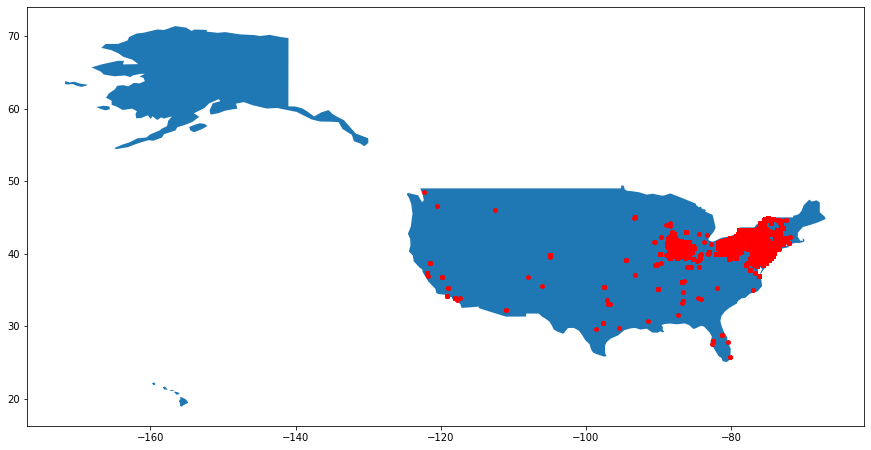

In [ ]:
geometry = [Point(xy) for xy in zip(geo_pandas_df['longitude'], geo_pandas_df['latitude'])]
gdf = GeoDataFrame(geo_pandas_df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
USA = world.query('name == "United States of America"')

gdf.plot(ax=USA.plot(figsize=(15, 10)), marker='o', color='red', markersize=15);

The Geo Distribution Map shows that the used cars for sale in this dataset are mostly located in the Northeastern United States.

####Heatmap

Encoding String Columns

In [ ]:

categoricalCols = [field for (field, dataType) in transform_df.dtypes 
                   if dataType == "string"]
indexOutputCols = [x + "Index" for x in categoricalCols]

heatmap_stringIndexer = StringIndexer(inputCols=categoricalCols, 
                              outputCols=indexOutputCols, 
                              handleInvalid="skip")

heatmap_stages = [heatmap_stringIndexer]
pipeline = Pipeline(stages=heatmap_stages)

heatmap_pipelineModel = pipeline.fit(transform_df)
encodingDF = heatmap_pipelineModel.transform(transform_df)

In [ ]:
heatmap_df = encodingDF.select("body_typeIndex", "exterior_colorIndex", "interior_colorIndex", "fuel_typeIndex", "has_accidentsIndex", "is_newIndex", "make_nameIndex", 
                               "maximum_seating", "mileage", "model_nameIndex", "owner_count",
                               "wheel_systemIndex", "year", "length", "width", "cityIndex", "price")

Convert Spark Dataframe to Pandas Dataframe

In [ ]:
pandasDF = heatmap_df.toPandas()
pandasDF.corr()

Out[39]:

,body_typeIndex,exterior_colorIndex,interior_colorIndex,fuel_typeIndex,has_accidentsIndex,is_newIndex,make_nameIndex,maximum_seating,mileage,model_nameIndex,owner_count,wheel_systemIndex,year,length,width,cityIndex,price
body_typeIndex,1.000000,0.055797,0.033663,0.190141,0.029265,-0.072532,0.027800,-0.151934,0.078751,0.307225,0.102197,0.385447,-0.149353,0.235328,0.154656,0.041301,0.042128
exterior_colorIndex,0.055797,1.000000,0.124878,0.015045,0.009685,-0.032256,0.150699,-0.040765,0.046200,0.169404,0.050254,0.005138,-0.091016,-0.060474,-0.027081,0.010288,0.051918
interior_colorIndex,0.033663,0.124878,1.000000,0.026987,-0.019300,0.056649,0.093142,0.003666,-0.039811,0.104658,-0.009627,0.002601,0.018442,0.015429,0.050902,-0.016972,0.141599
fuel_typeIndex,0.190141,0.015045,0.026987,1.000000,-0.016209,0.052072,-0.019844,-0.006587,0.007328,0.182035,0.002448,0.220585,-0.029770,0.220215,0.107304,0.014064,0.134776
has_accidentsIndex,0.029265,0.009685,-0.019300,-0.016209,1.000000,-0.288435,0.022188,0.001613,0.345018,0.068076,0.258367,0.004684,-0.290324,-0.019749,-0.054618,0.082615,-0.211875
is_newIndex,-0.072532,-0.032256,0.056649,0.052072,-0.288435,1.000000,-0.074741,-0.024741,-0.650641,-0.123749,-0.354228,0.005739,0.584947,0.008294,0.061503,-0.172340,0.417567
make_nameIndex,0.027800,0.150699,0.093142,-0.019844,0.022188,-0.074741,1.000000,-0.015424,0.027450,0.499096,0.069679,-0.144322,-0.079282,-0.112642,-0.037146,-0.014514,0.208668
maximum_seating,-0.151934,-0.040765,0.003666,-0.006587,0.001613,-0.024741,-0.015424,1.000000,0.039732,-0.095963,-0.034814,-0.084871,0.035981,0.342048,0.259249,-0.000781,0.128736
mileage,0.078751,0.046200,-0.039811,0.007328,0.345018,-0.650641,0.027450,0.039732,1.000000,0.166685,0.577055,0.042707,-0.766234,0.019617,-0.073890,0.215092,-0.494692
model_nameIndex,0.307225,0.169404,0.104658,0.182035,0.068076,-0.123749,0.499096,-0.095963,0.166685,1.000000,0.207285,0.077290,-0.307400,-0.036713,-0.033983,0.042871,0.137753


Out[40]:

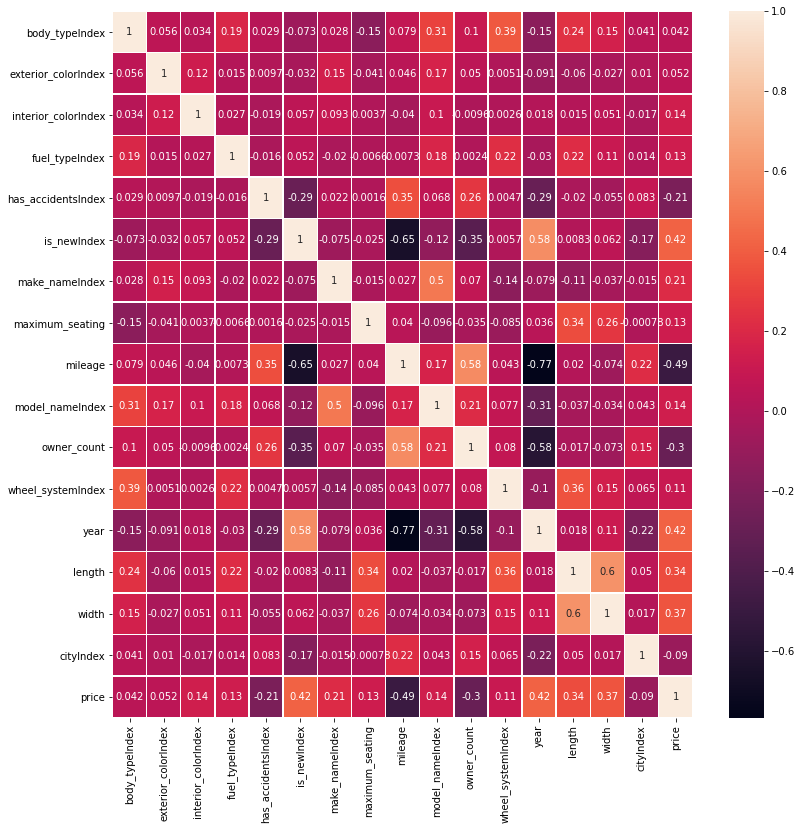

<matplotlib.axes._subplots.AxesSubplot at 0x7fdb0f804e50>

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(pandasDF.corr(), annot=True, fmt=".2g", linewidths=.5)

The heatmap shows that "is new", "year", "length", and "width" features are having pretty strong positive correlation with price, and "mileage" is having strong negative correlation with price.

## Regression Models

####Linear Regression

In [ ]:
RM_df = transform_df

Train/Test Split

In [ ]:
trainDF, testDF = RM_df.randomSplit([.8, .2], seed=42)
print(f"There are {trainDF.cache().count()} rows in the training set, and {testDF.cache().count()} in the test set")

There are 240204 rows in the training set, and 59796 in the test set

Use RFormula to perform One-Hot Encoding for string columns

In [ ]:
rFormula = RFormula(formula="price ~ .", featuresCol="features", labelCol="price", handleInvalid="skip")

In [ ]:
lr = LinearRegression(labelCol="price", featuresCol="features")

Pipeline

In [ ]:
pipeline = Pipeline(stages = [rFormula, lr])

pipelineModel = pipeline.fit(trainDF)
predDF = pipelineModel.transform(testDF)
predDF.select("features", "price", "prediction").show(5)

+--------------------+--------+------------------+
 features| price| prediction|
+--------------------+--------+------------------+
(18403,[300,11274...| 38778.0| 41865.54647773667|
(18403,[1255,7278...|104295.0| 89248.31613429147|
(18403,[9,7148,16...| 43879.0| 39502.79515240388|
(18403,[9,7149,16...| 26510.0|27138.494383091806|
(18403,[14,13238,...| 86395.0| 71662.8834968491|
+--------------------+--------+------------------+
only showing top 5 rows

In [ ]:
display(predDF.select("price", "prediction"))

price,prediction
38778.0,41865.54647773667
104295.0,89248.31613429147
43879.0,39502.79515240388
26510.0,27138.494383091806
86395.0,71662.8834968491
60390.0,64759.36887807213
38537.0,39884.94880743674
38738.0,39884.94880743674
35354.0,40664.66696776054
38778.0,38324.973738553934


Evaluate Model: RMSE & R2

In [ ]:
regressionEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="price", metricName="rmse")

rmse = np.round(regressionEvaluator.evaluate(predDF), 2)
print(f"Linear Regression Model RMSE is {rmse}")

r2 = np.round(regressionEvaluator.setMetricName("r2").evaluate(predDF), 2)
print(f"Linear Regression Model R2 is {r2}")

Linear Regression Model RMSE is 6479.34
Linear Regression Model R2 is 0.85

#### Decision Tree

In [ ]:
DT_df = transform_df

In [ ]:
DT_trainDF, DT_testDF = DT_df.randomSplit([.8, .2], seed=42)
print(f"There are {DT_trainDF.cache().count()} rows in the training set, and {DT_testDF.cache().count()} in the test set")

There are 240204 rows in the training set, and 59796 in the test set

StringIndexer/VectorAssembler and Pipeline

In [ ]:
categoricalCols = [field for (field, dataType) in DT_trainDF.dtypes if dataType == "string"]
indexOutputCols = [x + "Index" for x in categoricalCols]

stringIndexer = StringIndexer(inputCols=categoricalCols, outputCols=indexOutputCols, handleInvalid="skip")

numericCols = [field for (field, dataType) in DT_trainDF.dtypes 
               if ((dataType == "double") & (field != "price"))]

assemblerInputs = indexOutputCols + numericCols
vecAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

dt = DecisionTreeRegressor(labelCol="price")

DT_stages = [stringIndexer, vecAssembler, dt]
DT_pipeline = Pipeline(stages=DT_stages)
dt.setMaxBins(10000)
DT_pipelineModel = DT_pipeline.fit(DT_trainDF)

In [ ]:
DT_predDF = DT_pipelineModel.transform(DT_testDF)

display(DT_predDF.select("price", "prediction"))

price,prediction
38778.0,40504.88018934038
104295.0,90690.64653243848
43879.0,40504.88018934038
26510.0,27548.01474786631
86395.0,90690.64653243848
60390.0,56626.97783196396
38537.0,40504.88018934038
38738.0,40504.88018934038
35354.0,40504.88018934038
38778.0,40504.88018934038


Evaluate Model: RMSE & R2

In [ ]:
DT_regressionEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="price", metricName="rmse")

DT_rmse = np.round(DT_regressionEvaluator.evaluate(DT_predDF), 2)
print(f"Decision Tree Model RMSE is {DT_rmse}")

DT_r2 = np.round(DT_regressionEvaluator.setMetricName("r2").evaluate(DT_predDF), 2)
print(f"Decision Tree Model R2 is {DT_r2}")

Decision Tree Model RMSE is 12326.24
Decision Tree Model R2 is 0.46

#### Random Forest

In [ ]:
RF_df = transform_df

RF_trainDF, RF_testDF = RF_df.randomSplit([.8, .2], seed=42)
print(f"There are {RF_trainDF.cache().count()} rows in the training set, and {RF_testDF.cache().count()} in the test set")

There are 240204 rows in the training set, and 59796 in the test set

In [ ]:
rf = RandomForestRegressor(labelCol="price", maxBins=10000, seed=42)
RF_pipeline = Pipeline(stages = [stringIndexer, vecAssembler, rf])

In [ ]:
RF_pipelineModel = RF_pipeline.fit(RF_trainDF)

In [ ]:
RF_predDF = RF_pipelineModel.transform(RF_testDF)

display(RF_predDF.select("price", "prediction"))

price,prediction
38778.0,74204.50488155929
104295.0,79860.27738662367
43879.0,45051.15527519494
26510.0,28473.229179403676
86395.0,92085.92012113225
60390.0,54686.16278093783
38537.0,43969.495939639724
38738.0,43969.495939639724
35354.0,43397.61603339438
38778.0,61285.82412604008


In [ ]:
RF_regressionEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="price", metricName="rmse")

RF_rmse = np.round(RF_regressionEvaluator.evaluate(RF_predDF), 2)
print(f"Ramdon Forest Model RMSE is {RF_rmse}")

RF_r2 = np.round(RF_regressionEvaluator.setMetricName("r2").evaluate(RF_predDF), 2)
print(f"Ramdon Forest Model R2 is {RF_r2}")

Ramdon Forest Model RMSE is 7737.86
Ramdon Forest Model R2 is 0.79

####Among the three regression models, Linear Regression has the best performance.

####Perform hyperparameter turning with cross-validation for Linear Regression model.

In [ ]:
LR_df = transform_df

LR_trainDF, LR_testDF = LR_df.randomSplit([.8, .2], seed=42)
print(f"There are {LR_trainDF.cache().count()} rows in the training set, and {LR_testDF.cache().count()} in the test set")

There are 240204 rows in the training set, and 59796 in the test set

Grid Search, Cross Validation, and Pipeline

In [ ]:
LR_paramGrid = (ParamGridBuilder()
            .addGrid(lr.regParam, [0.1, 0.01, 0.001])
            .addGrid(lr.fitIntercept, [False, True])
            .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
            .build())

In [ ]:
LR_ht_evaluator = RegressionEvaluator(labelCol="price", 
                                predictionCol="prediction", 
                                metricName="rmse")

LR_cv = CrossValidator(estimator=lr, 
                    evaluator=LR_ht_evaluator, 
                    estimatorParamMaps=LR_paramGrid, 
                    numFolds=10, 
                    parallelism=4, 
                    seed=42)

LR_cv_pipeline = Pipeline(stages=[rFormula, LR_cv])

LR_cv_pipelineModel = RF_pipeline.fit(LR_trainDF)

In [ ]:
LR_cv_predDF = LR_cv_pipelineModel.transform(LR_trainDF)

display(LR_cv_predDF.select("price", "prediction"))

price,prediction
94845.0,80115.28038881437
36337.0,43397.61603339438
80845.0,106203.46146692421
46110.0,64665.395547990665
132395.0,89805.76775051678
77195.0,78916.98345602109
39145.0,45772.177576833266
35975.0,44999.19150828353
25674.0,28685.13657058534
43914.0,45051.15527519494


In [ ]:
LR_cv_regressionEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="price", metricName="rmse")

LR_cv_rmse = np.round(LR_cv_regressionEvaluator.evaluate(LR_cv_predDF), 2)
print(f"Linear Regression Model RMSE is {LR_cv_rmse}")

LR_cv_r2 = np.round(LR_cv_regressionEvaluator.setMetricName("r2").evaluate(LR_cv_predDF), 2)
print(f"Linear Regression Model R2 is {LR_cv_r2}")

Linear Regression Model RMSE is 7296.59
Linear Regression Model R2 is 0.82

## Classification Model (NLP Sentiment Analysis)

In [ ]:
description_df = file_df.select("description", "price")

Drop records with Null description

In [ ]:
description_df = description_df.na.drop(subset=['description'])

In [ ]:
description_df = description_df.withColumn("price", description_df["price"].cast(DoubleType()))

In [ ]:
description_df.select([count(when(col(c).isNull(), c)).alias(c) for c in description_df.columns]).show()

+-----------+-----+
description|price|
+-----------+-----+
 0| 0|
+-----------+-----+

Use Binarizer to split the data into two categories based on the average price.

In [ ]:
avgPrice = description_df.agg(mean("price"))
display(avgPrice)

avg(price)
29461.5461783237


In [ ]:
binarizer = Binarizer(threshold=29461.5461783237, inputCol='price', outputCol='Label')

categorize_stages = [binarizer]
categorize_pipeline = Pipeline(stages=categorize_stages)

categorized_df = categorize_pipeline.fit(description_df).transform(description_df)


Display counts of categories

Average Price = 29461.5461783237

0 : Above Average

1 : Below Average

In [ ]:
display(categorized_df.limit(5))

description,price,Label
"[!@@Additional Info@@!]6.386 Axle Ratio,Heated Front Bucket Seats,Cloth Seat Trim,Radio: AM/FM/CD/AUX,Black Splash Guards (Set of 4),Chrome Rear Bumper Protector,Floor Mats & 2-PC Cargo Area Protector,First Aid Kit,4-Wheel Disc Brakes,6 Speakers,Air Conditioning,Electronic Stability Control,Front Bucket Seats,Leather Shift Knob,Power Liftgate,Spoiler,Tachometer,ABS brakes,Alloy wheels,Anti-whiplash front head restraints,Automatic temperature control,Brake assist,Bumpers: body-color,CD player,Delay-off headlights,Driver door bin,Driver vanity mirror,Dual front impact airbags,Dual front side impact airbags,Four wheel independent suspension,Front anti-roll bar,Front dual zone A/C,Front reading lights,Fully automatic headlights,Heated door mirrors,Heated front seats,Illuminated entry,Low tire pressure warning,Occupant sensing airbag,Outside temperature display,Overhead airbag,Overhead console,Panic alarm,Passenger door bin,Passenger vanity mirror,Power door mirrors,Power driver seat,Power steering,Power windows,Radio data system,Rear anti-roll bar,Rear seat center armrest,Rear window defroster,Rear window wiper,Remote keyless entry,Roof rack: rails only,Security system,Speed control,Speed-sensing steering,Split folding rear seat,Steering wheel mounted audio controls,Telescoping steering wheel,Tilt steering wheel,Traction control,Trip computer,Turn signal indicator mirrors,Variably intermittent wipers,Front beverage holders,Blind Spot Warning,Lane Departure Warning System,Front Center Armrest w/Storage,AM/FM radio: SiriusXM,Auto High-beam Headlights,NissanConnect featuring Apple CarPlay and Android Auto",29790.0,1.0
", Located at Crowley Chrysler Jeep on Route 6 in Bristol. OPTIONS Include:. Diamond Black 4WD 8-Speed Automatic 3.6L V6 24V VVT 2021 Jeep Grand Cherokee Limited Price includes: $2000 - 2021 National Retail Consumer Cash 21CM1. Exp. 09/30/2020 $500 - Chrysler Capital 2021 Bonus Cash 20CM5. Exp. 09/30/2020[!@@Additional Info@@!]Quick Order Package 2BK 80th,3.45 Rear Axle Ratio,Wheels: 18"" x 8.0"" Tech Gray Diamond Cut,Wheels: 20"" x 8.0"" Granite Crystal Aluminum...,Leather Trimmed Bucket Seats,Leather Trimmed Bucket Seats (JY),Normal Duty Suspension,Dual-Pane Panoramic Sunroof,80th Anniversary Luxury Group,Premium Lighting Group,Radio: Uconnect 4C Nav w/8.4"" Display,Cargo Compartment Cover,Jeep 80th Anniversary Edition,Advanced Brake Assist,Ventilated Front Seats...,LT. Tungsten Interior Accent Stitching,Jeep 80th Anniversary Oak Keyfob Medallion,Berber Floor Mats w/80th Anniversary Tag,230MM Rear Axle,Rain Sensitive Windshield Wipers,GPS Navigation,GPS Antenna Input,Active Noise Control System,Heated Second Row Seats,Lane Departure Warning Plus...,Dark Lens Taillamps,Granite Crystal Exterior Mirror Caps,Bi-Xenon High-Intensity Discharge Headlamps...,Auto High Beam Headlamp Control,LED Daytime Running Headlamps,Front LED Fog Lamps,Full Speed FWD Collision Warn Plus...,Granite Crystal Exterior Badging,Jeep 80th Anniversary Badges,Dark Headlamp Bezel Finish,Granite Crystal/Black Grille,Front Accent/Body Color Fascia,Rear Accent/Body Color Fascia,Dark Day Light Opening Moldings,Body Color Door Handles,Body Color Claddings,Black Roof Molding,Adaptive Cruise Control w/Stop...,Premium Alpine Speaker System,HD Radio,Google Android Auto...,506 Watt Amplifier...,8.4"" Touchscreen Display...,Apple CarPlay...,Body Color Shark Fin Antenna,SiriusXM Satellite Radio,1-Year SiriusXM Guardian Trial,SiriusXM Travel Link,SiriusXM Traffic Plus,4G LTE Wi-Fi Hot Spot,Power Tilt/Telescope Steering Column,Granite Crystal Exterior Accents,Parallel & Perp Park Assist w/Stop...,Integrated Voice Command w/BLUETOOTH...,Piano Black/Anod. Gunmetal Interior Accents,Telescoping steering wheel,Tilt steering wheel,Traction control,Trip computer,Turn signal indicator mirrors,Variably intermittent wipers,Front beverage holders,Auto-dimming Rear-View mirror,Speed-Sensitive Wipers,Compass,Front Center Armrest w/Storage,AM/FM radio:

In [ ]:
display(categorized_df.select("Label").where(col("Label").isNotNull()).groupBy("Label").count().orderBy("count", ascending=False))

Label,count
0.0,171481
1.0,121032


Tokenize text

In [ ]:
tokenizer = Tokenizer(inputCol="description", outputCol="words")

Remove stop words

In [ ]:
stopwords = StopWordsRemover.loadDefaultStopWords("english")
stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered", stopWords=stopwords)

Count vectors

In [ ]:
countVectors = CountVectorizer(inputCol="filtered", outputCol="rawFeatures", vocabSize=10000, minDF=5)

TF-IDF to down-weights features which appear frequently in a corpus.

In [ ]:
idf = IDF(inputCol="rawFeatures", outputCol="features")

Put everything into a pipeline and transform the dataset

In [ ]:
text_pipeline = Pipeline(stages=[tokenizer, stopwordsRemover, countVectors, idf]).fit(categorized_df)

In [ ]:
tfidf_df = text_pipeline.transform(categorized_df)


In [ ]:
display(tfidf_df.limit(1))

description,price,Label,words,filtered,rawFeatures,features
"[!@@Additional Info@@!]6.386 Axle Ratio,Heated Front Bucket Seats,Cloth Seat Trim,Radio: AM/FM/CD/AUX,Black Splash Guards (Set of 4),Chrome Rear Bumper Protector,Floor Mats & 2-PC Cargo Area Protector,First Aid Kit,4-Wheel Disc Brakes,6 Speakers,Air Conditioning,Electronic Stability Control,Front Bucket Seats,Leather Shift Knob,Power Liftgate,Spoiler,Tachometer,ABS brakes,Alloy wheels,Anti-whiplash front head restraints,Automatic temperature control,Brake assist,Bumpers: body-color,CD player,Delay-off headlights,Driver door bin,Driver vanity mirror,Dual front impact airbags,Dual front side impact airbags,Four wheel independent suspension,Front anti-roll bar,Front dual zone A/C,Front reading lights,Fully automatic headlights,Heated door mirrors,Heated front seats,Illuminated entry,Low tire pressure warning,Occupant sensing airbag,Outside temperature display,Overhead airbag,Overhead console,Panic alarm,Passenger door bin,Passenger vanity mirror,Power door mirrors,Power driver seat,Power steering,Power windows,Radio data system,Rear anti-roll bar,Rear seat center armrest,Rear window defroster,Rear window wiper,Remote keyless entry,Roof rack: rails only,Security system,Speed control,Speed-sensing steering,Split folding rear seat,Steering wheel mounted audio controls,Telescoping steering wheel,Tilt steering wheel,Traction control,Trip computer,Turn signal indicator mirrors,Variably intermittent wipers,Front beverage holders,Blind Spot Warning,Lane Departure Warning System,Front Center Armrest w/Storage,AM/FM radio: SiriusXM,Auto High-beam Headlights,NissanConnect featuring Apple CarPlay and Android Auto",29790.0,1.0,"List([!@@additional, info@@!]6.386, axle, ratio,heated, front, bucket, seats,cloth, seat, trim,radio:, am/fm/cd/aux,black, splash, guards, (set, of, 4),chrome, rear, bumper, protector,floor, mats, &, 2-pc, cargo, area, protector,first, aid, kit,4-wheel, disc, brakes,6, speakers,air, conditioning,electronic, stability, control,front, bucket, seats,leather, shift, knob,power, liftgate,spoiler,tachometer,abs, brakes,alloy, wheels,anti-whiplash, front, head, restraints,automatic, temperature, control,brake, assist,bumpers:, body-color,cd, player,delay-off, headlights,driver, door, bin,driver, vanity, mirror,dual, front, impact, airbags,dual, front, side, impact, airbags,four, wheel, independent, suspension,front, anti-roll, bar,front, dual, zone, a/c,front, reading, lights,fully, automatic, headlights,heated, door, mirrors,heated, front, seats,illuminated, entry,low, tire, pressure, warning,occupant, sensing, airbag,outside, temperature, display,overhead, airbag,overhead, console,panic, alarm,passenger, door, bin,passenger, vanity, mirror,power, door, mirrors,power, driver, seat,power, steering,power, windows,radio, data, system,rear, anti-roll, bar,rear, seat, center, armrest,rear, window, defroster,rear, window, wiper,remote, keyless, entry,roof, rack:, rails, only,security, system,speed, control,speed-sensing, steering,split, folding, rear, seat,steering, wheel, mounted, audio, controls,telescoping, steering, wheel,tilt, steering, wheel,traction, control,trip, computer,turn, signal, indicator, mirrors,variably, intermittent, wipers,front, beverage, holders,blind, spot, warning,lane, departure, warning, system,front, center, armrest, w/storage,am/fm, radio:, siriusxm,auto, high-beam, headlights,nissanconnect, featuring, apple, carplay, and, android, auto)","List([!@@additional, info@@!]6.386, axle, ratio,heated, front, bucket, seats,cloth, seat, trim,radio:, am/fm/cd/aux,black, splash, guards, (set, 4),chrome, rear, bumper, protector,floor, mats, &, 2-pc, cargo, area, protector,first, aid, kit,4-wheel, disc, brakes,6, speakers,air, conditioning,electronic, stability, control,front, bucket, seats,leather, shift, knob,power, liftgate,spoiler,tachometer,abs, brakes,alloy, wheels,anti-whiplash, front, head, restraints,automatic, temperature, control,brake, assist,b

#### Logistic Regression

Train/Test Split

In [ ]:
classification_df = tfidf_df.select('Label', 'features')

In [ ]:
classification_trainDF, classification_testDF = classification_df.randomSplit([.8, .2], seed=42)
print(f"There are {classification_trainDF.cache().count()} rows in the training set, and {classification_testDF.cache().count()} in the test set")

There are 234192 rows in the training set, and 58321 in the test set

In [ ]:
lr = LogisticRegression(labelCol='Label', featuresCol='features', maxIter=1000, regParam=0.2, elasticNetParam=0.8)

In [ ]:
lrModel = lr.fit(classification_trainDF)
LR_predDF = lrModel.transform(classification_testDF)

In [ ]:
LR_evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="accuracy")

print(f"Logistic Regression Model accuracy is {LR_evaluator.evaluate(LR_predDF)}")

Logistic Regression Model accuracy is 0.58313471991221

####Naive Bayes

In [ ]:
nb = NaiveBayes(labelCol='Label', featuresCol='features', smoothing=1)
nbModel = nb.fit(classification_trainDF)
NB_predDF = nbModel.transform(classification_testDF)

In [ ]:
NB_evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="accuracy")

print(f"Naive Bayes Model accuracy is {NB_evaluator.evaluate(NB_predDF)}")

Naive Bayes Model accuracy is 0.8376742511273813

####Random Forest

In [ ]:
rf = RandomForestClassifier(labelCol="Label", featuresCol="features", numTrees=100)
rfModel = rf.fit(classification_trainDF)
RF_predDF = rfModel.transform(classification_testDF)

In [ ]:
RF_evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="accuracy")

print(f"Random Forest Model accuracy is {RF_evaluator.evaluate(RF_predDF)}")

Random Forest Model accuracy is 0.7442430685344902

####Among the three classification models, Naive Bayes has the highest accuracy score.

####Perform hyperparameter turning with cross-validation for Naive Bayes model.

In [ ]:
nb_paramGrid = (ParamGridBuilder()
            .addGrid(nb.smoothing, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
            .build())

NB_evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="accuracy")
NB_cv = CrossValidator(estimator=nb, estimatorParamMaps=nb_paramGrid, evaluator=NB_evaluator, 
                    numFolds=10, 
                    parallelism=4, 
                    seed=42)

NB_cvModel = NB_cv.fit(classification_trainDF)

/databricks/spark/python/pyspark/ml/util.py:800: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [ ]:
NBcv_predDF = NB_cvModel.transform(classification_testDF)

In [ ]:
NBcv_evaluator = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="accuracy")

print(f"Naive Bayes Model accuracy is {NBcv_evaluator.evaluate(NBcv_predDF)}")

Naive Bayes Model accuracy is 0.8379828878105656

## Summary

From Regression Models, Linear Regression had the best performance and From Classification Models, Naive Bayes had the highest accuracy score.

The factors that influence the used car price the most were mileage of the car, whether the vehicle is new, the year made, and the length and width of the vehicle. 

####Interesting Insights: 

Model make or name did not have much impact on price.
Car description is essential to predict price range.

####Limitations:

1. Biased Region
2. Whole dataset 

####Future Research: 

1. Running the whole dataset to see if the results differ.
2. Finding dataset for different regions 
3. Looking into difference between selling car to used car shops vs trade-ins at dealerships